# Random Forest

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
glass = pd.read_excel("/content/glass 1.xlsx")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


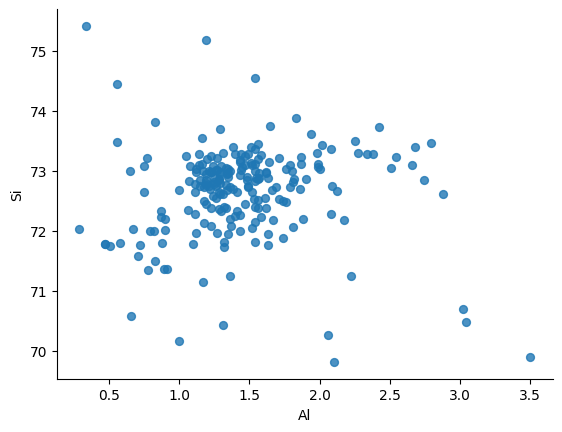

In [3]:
from matplotlib import pyplot as plt
glass.plot(kind='scatter', x='Al', y='Si', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

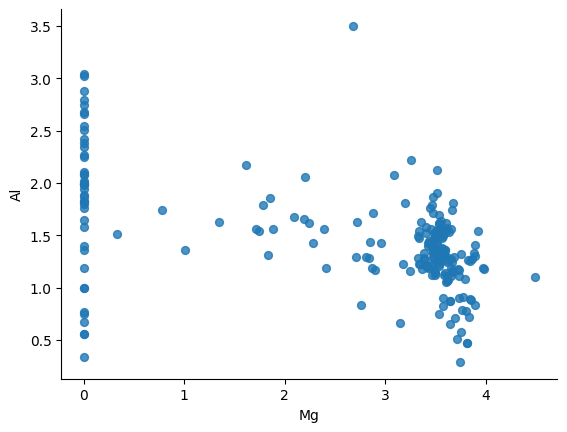

In [4]:
from matplotlib import pyplot as plt
glass.plot(kind='scatter', x='Mg', y='Al', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

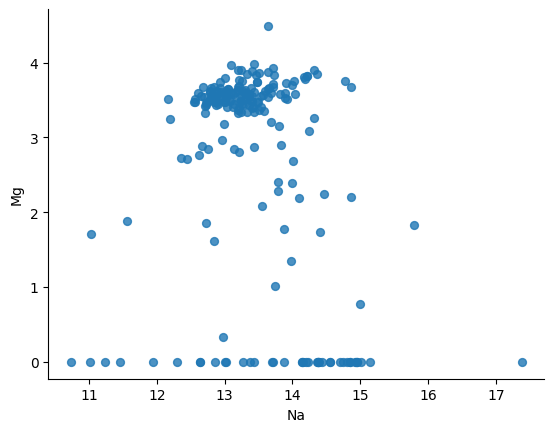

In [5]:
from matplotlib import pyplot as plt
glass.plot(kind='scatter', x='Na', y='Mg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

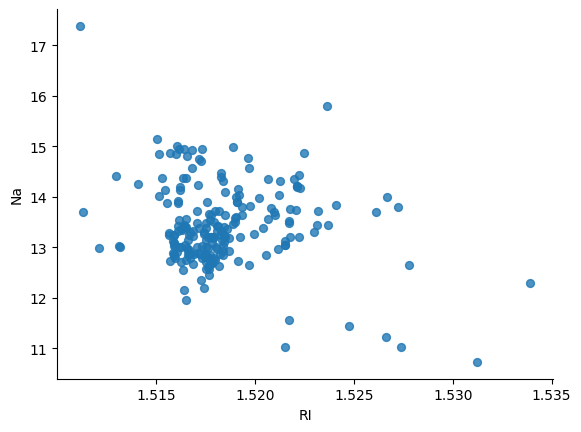

In [6]:
from matplotlib import pyplot as plt
glass.plot(kind='scatter', x='RI', y='Na', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
glass.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,int64


# Data Preprocessing

In [8]:
glass.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [9]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
glass=glass.dropna()
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


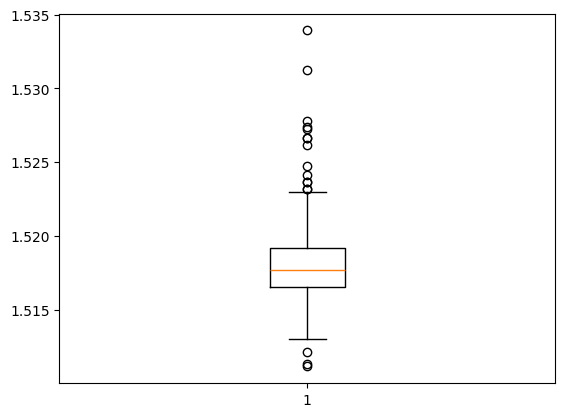

In [11]:
plt.boxplot(glass["RI"])
plt.show()

In [12]:
Q1 = glass["RI"].quantile(0.25)
Q3 = glass["RI"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
glass = glass[(glass["RI"] >= lower_bound) & (glass["RI"] <= upper_bound)]

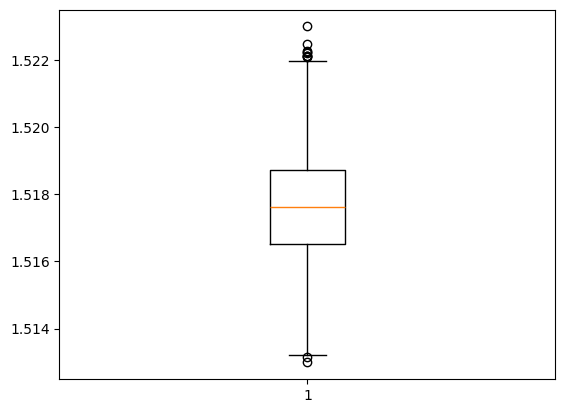

In [13]:
plt.boxplot(glass["RI"])
plt.show()

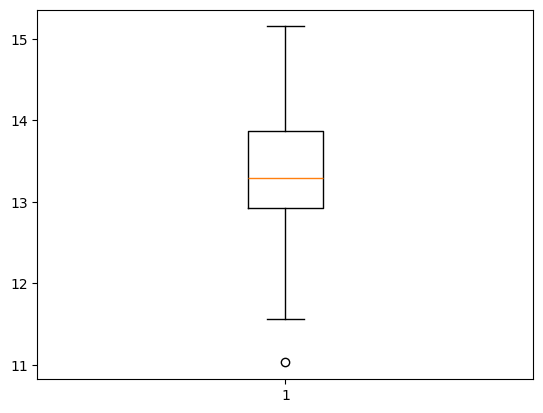

In [14]:
plt.boxplot(glass["Na"])
plt.show()

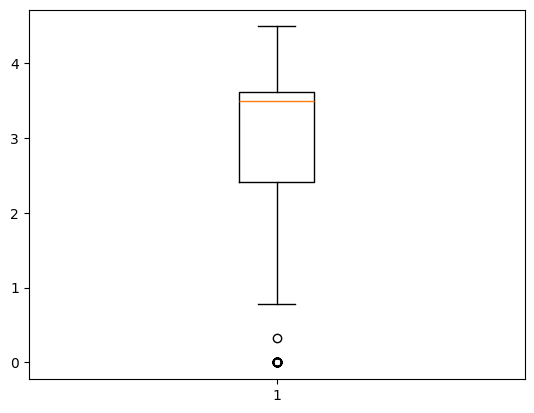

In [15]:
plt.boxplot(glass["Mg"])
plt.show()

In [16]:
Q1 = glass["Mg"].quantile(0.25)
Q3 = glass["Mg"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
glass = glass[(glass["Mg"] >= lower_bound) & (glass["Mg"] <= upper_bound)]

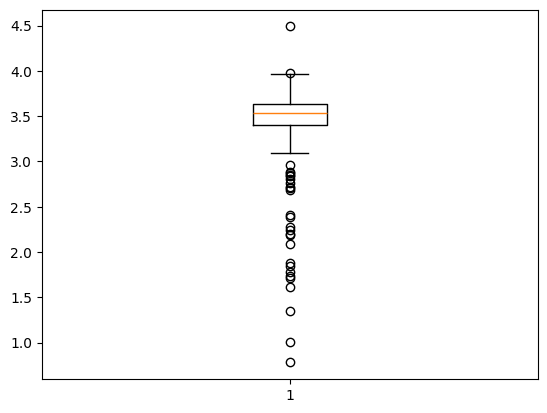

In [17]:
plt.boxplot(glass["Mg"])
plt.show()

In [19]:
Q1 = glass["Al"].quantile(0.25)
Q3 = glass["Al"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
glass = glass[(glass["Al"] >= lower_bound) & (glass["Al"] <= upper_bound)]

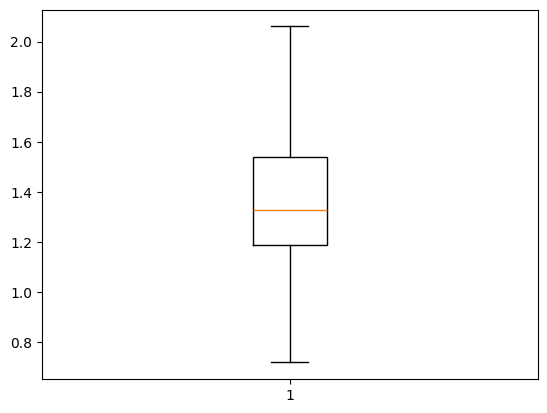

In [20]:
plt.boxplot(glass["Al"])
plt.show()

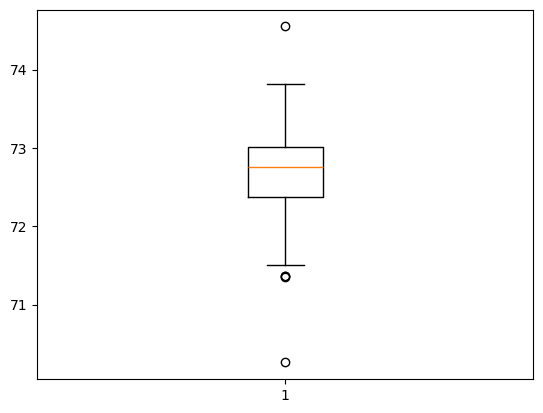

In [21]:
plt.boxplot(glass["Si"])
plt.show()

In [22]:
Q1 = glass["Si"].quantile(0.25)
Q3 = glass["Si"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
glass = glass[(glass["Si"] >= lower_bound) & (glass["Si"] <= upper_bound)]

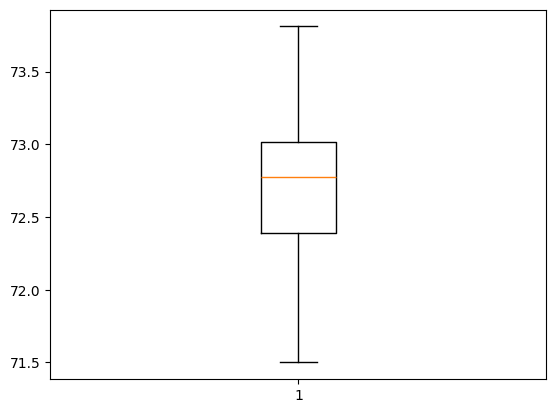

In [23]:
plt.boxplot(glass["Si"])
plt.show()

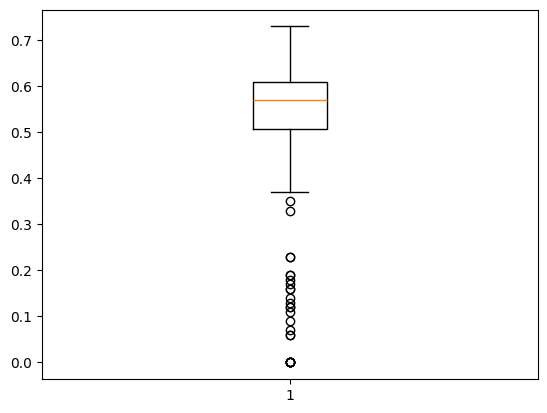

In [24]:
plt.boxplot(glass["K"])
plt.show()

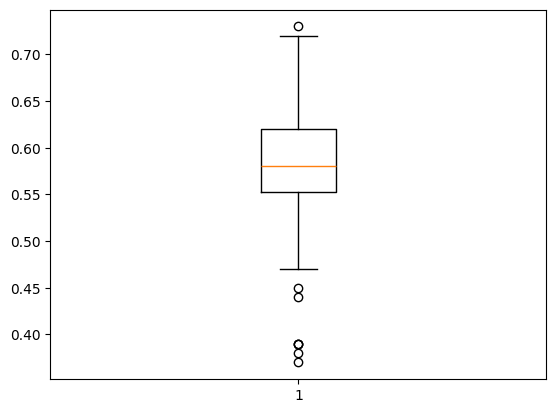

In [25]:
Q1 = glass["K"].quantile(0.25)
Q3 = glass["K"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
glass = glass[(glass["K"] >= lower_bound) & (glass["K"] <= upper_bound)]
plt.boxplot(glass["K"])
plt.show()

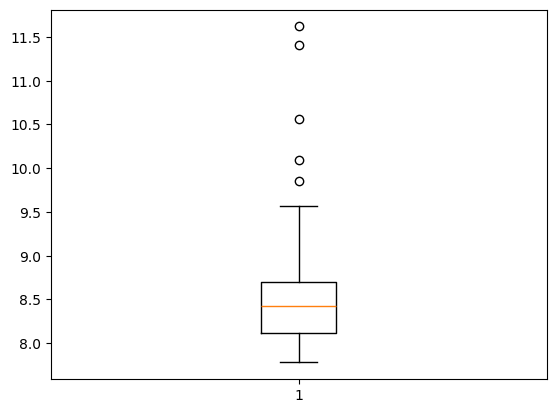

In [26]:
plt.boxplot(glass["Ca"])
plt.show()

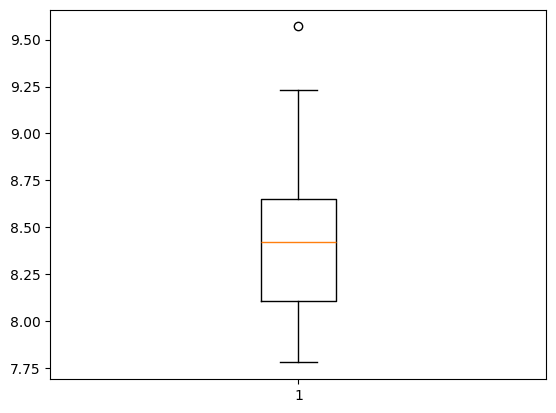

In [27]:
Q1 = glass["Ca"].quantile(0.25)
Q3 = glass["Ca"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
glass = glass[(glass["Ca"] >= lower_bound) & (glass["Ca"] <= upper_bound)]
plt.boxplot(glass["Ca"])
plt.show()

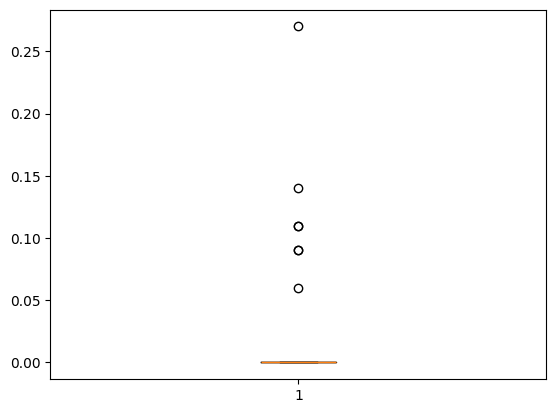

In [28]:
plt.boxplot(glass["Ba"])
plt.show()

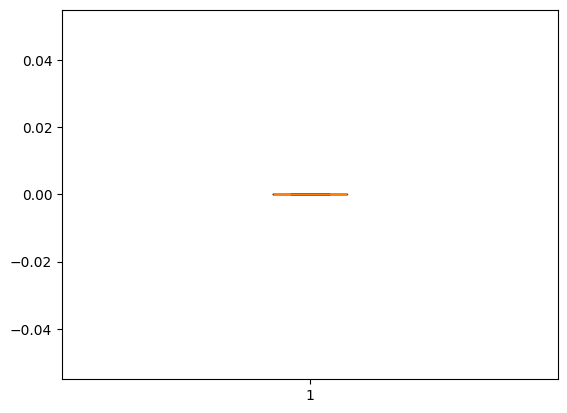

In [29]:
Q1 = glass["Ba"].quantile(0.25)
Q3 = glass["Ba"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
glass = glass[(glass["Ba"] >= lower_bound) & (glass["Ba"] <= upper_bound)]
plt.boxplot(glass["Ba"])
plt.show()

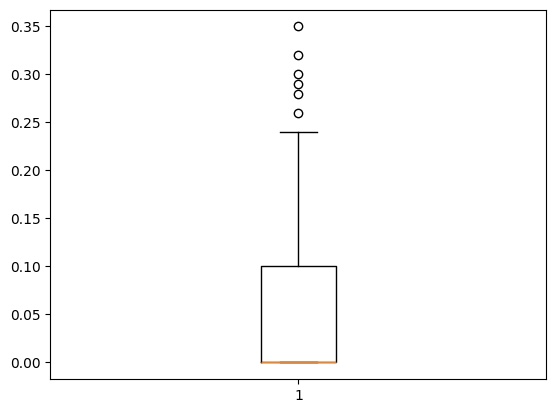

In [30]:
plt.boxplot(glass["Fe"])
plt.show()

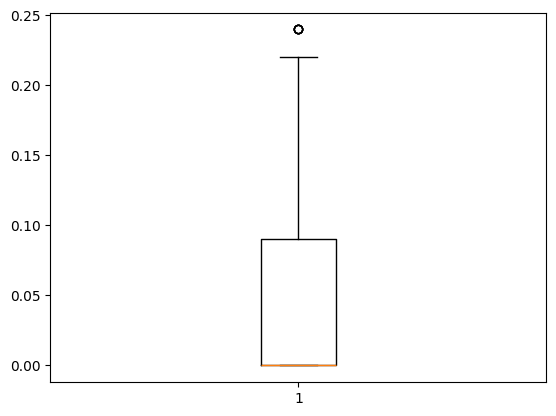

In [31]:
Q1 = glass["Fe"].quantile(0.25)
Q3 = glass["Fe"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
glass = glass[(glass["Fe"] >= lower_bound) & (glass["Fe"] <= upper_bound)]
plt.boxplot(glass["Fe"])
plt.show()

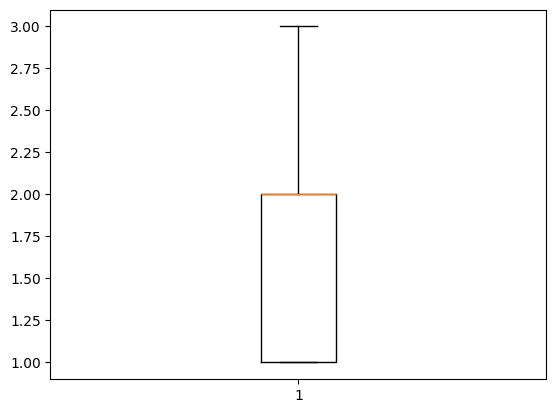

In [32]:
plt.boxplot(glass["Type"])
plt.show()

In [33]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
# Standard Scaling
standard_scaler = StandardScaler()
scaled_data_standard = standard_scaler.fit_transform(glass)
scaled_data_standard

array([[ 0.29226598,  2.26504428,  0.40968855, ...,  0.        ,
        -0.57985561, -1.02454872],
       [-1.13471356,  1.2345028 ,  0.18661206, ...,  0.        ,
        -0.57985561, -1.02454872],
       [ 0.34216037,  0.31846594,  0.81122623, ...,  0.        ,
        -0.57985561, -1.02454872],
       ...,
       [ 0.44194915,  1.2345028 , -0.4380021 , ...,  0.        ,
        -0.57985561,  2.01982463],
       [ 0.64152671,  1.14862435, -0.66107859, ...,  0.        ,
         0.65365541,  2.01982463],
       [ 1.00076632,  0.66197976, -0.75030918, ...,  0.        ,
        -0.57985561,  2.01982463]])

In [34]:
from sklearn.preprocessing import MinMaxScaler
# Min-Max Scaling
minmax_scaler = MinMaxScaler()
scaled_data_minmax = minmax_scaler.fit_transform(glass)
scaled_data_minmax

array([[0.31803279, 0.92021277, 0.7007874 , ..., 0.        , 0.        ,
        0.        ],
       [0.08360656, 0.7287234 , 0.66141732, ..., 0.        , 0.        ,
        0.        ],
       [0.32622951, 0.55851064, 0.77165354, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.34262295, 0.7287234 , 0.5511811 , ..., 0.        , 0.        ,
        1.        ],
       [0.37540984, 0.71276596, 0.51181102, ..., 0.        , 0.375     ,
        1.        ],
       [0.43442623, 0.62234043, 0.49606299, ..., 0.        , 0.        ,
        1.        ]])

# Data Visualization

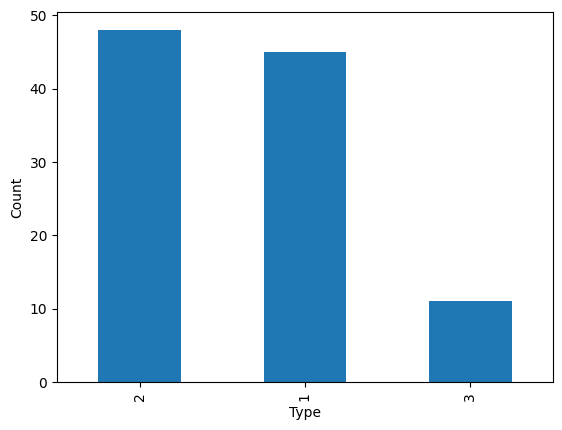

In [35]:
glass["Type"].value_counts().plot(kind='bar')
# Add labels
plt.xlabel('Type')
plt.ylabel('Count')
# Show the plot
plt.show()

In [36]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,0.112558,0.119473,-0.411694,-0.389915,-0.101900,0.527862,NaN,0.030877,-0.283903
Na,0.112558,1.000000,0.252616,-0.014180,-0.642772,-0.359758,-0.307472,NaN,-0.183155,0.131456
Mg,0.119473,0.252616,1.000000,-0.112102,-0.282293,-0.060664,-0.483946,NaN,-0.093993,0.080182
Al,-0.411694,-0.014180,-0.112102,1.000000,-0.124871,0.264455,-0.409398,NaN,-0.039480,0.341190
Si,-0.389915,-0.642772,-0.282293,-0.124871,1.000000,0.072888,-0.154089,NaN,0.071728,-0.320673
K,-0.101900,-0.359758,-0.060664,0.264455,0.072888,1.000000,-0.036310,NaN,0.052779,0.049001
Ca,0.527862,-0.307472,-0.483946,-0.409398,-0.154089,-0.036310,1.000000,NaN,0.180093,-0.134659
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe,0.030877,-0.183155,-0.093993,-0.039480,0.071728,0.052779,0.180093,NaN,1.000000,-0.026387
Type,-0.283903,0.131456,0.080182,0.341190,-0.320673,0.049001,-0.134659,NaN,-0.026387,1.000000


<Axes: >

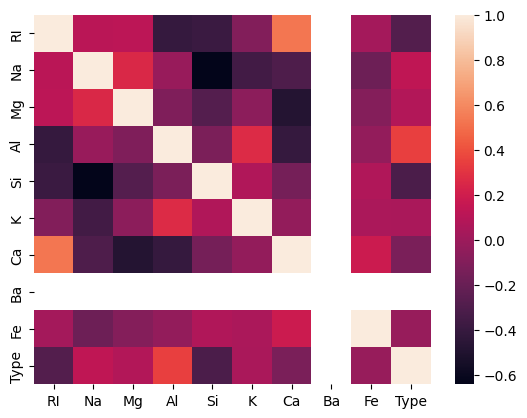

In [37]:
sns.heatmap(glass.corr())

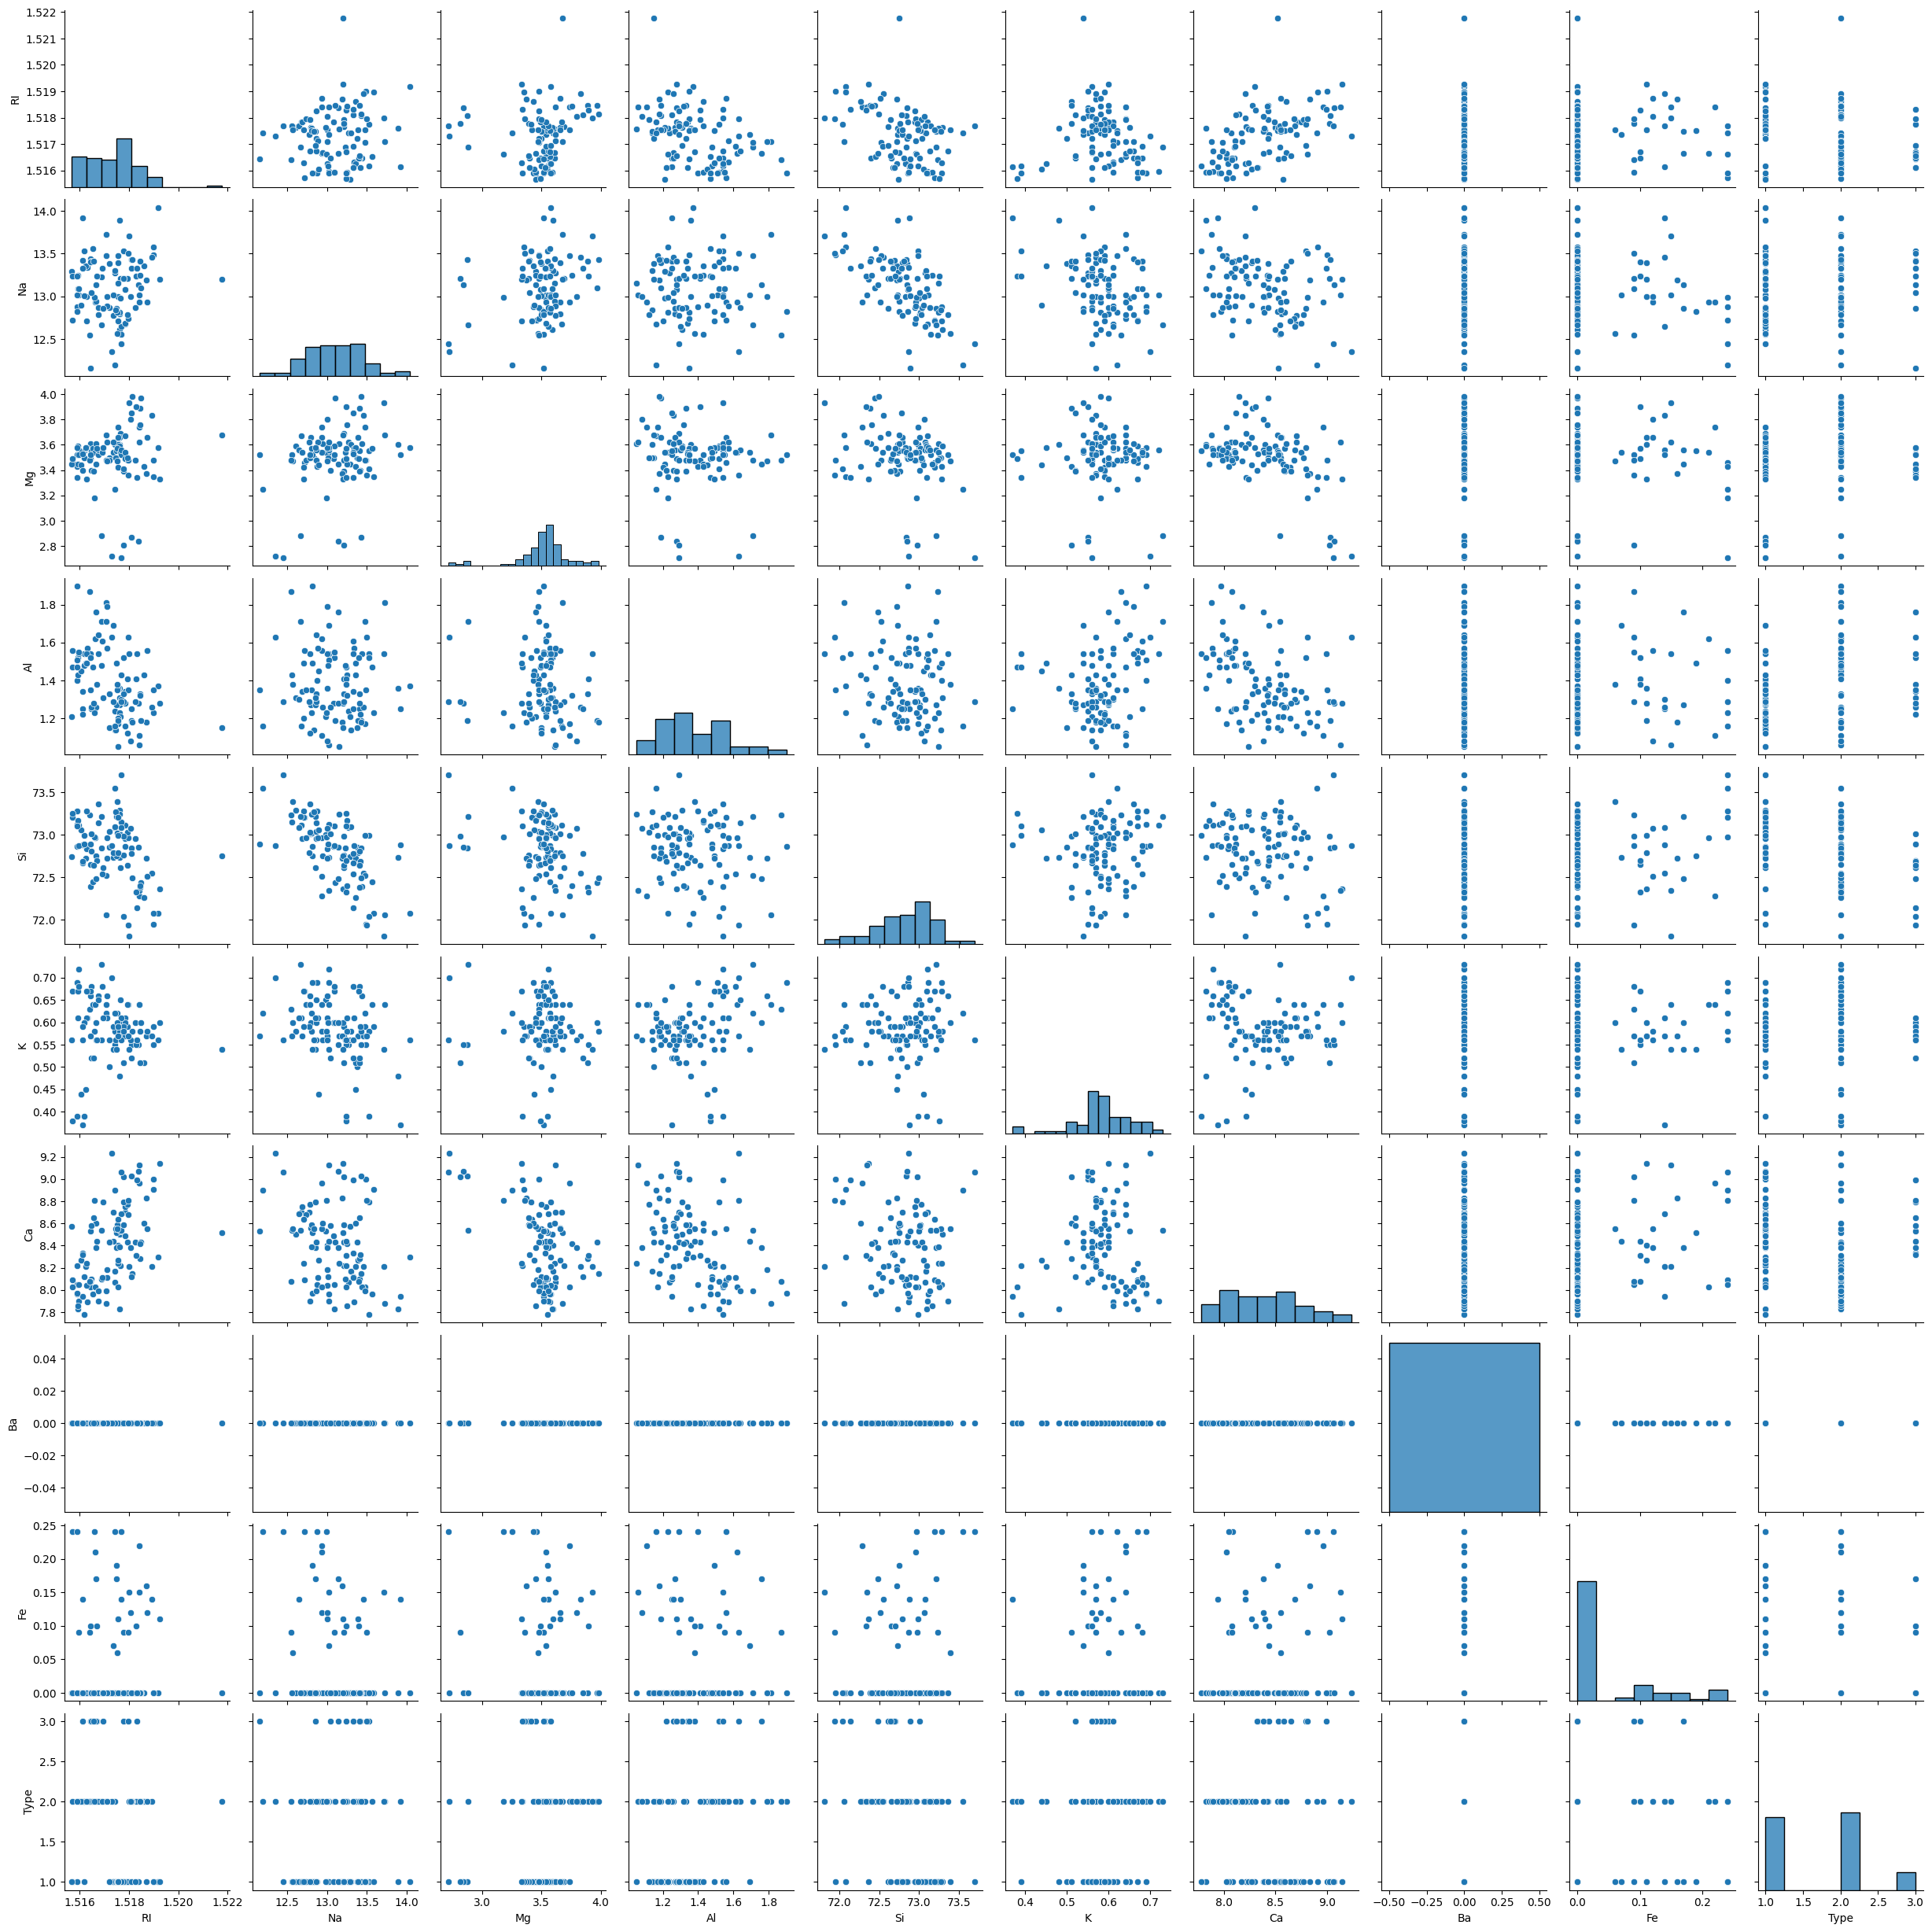

In [38]:
sns.pairplot(glass)

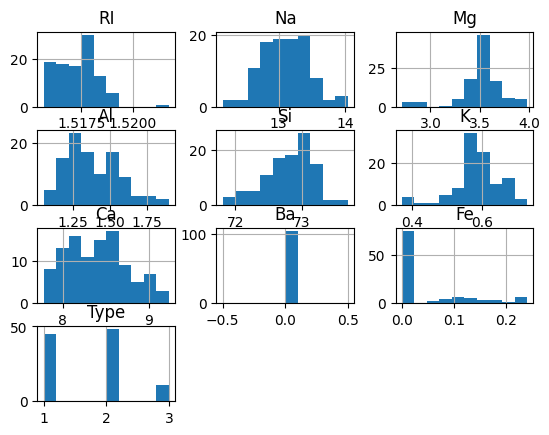

In [39]:
glass.hist()
plt.show()

# Random Forest Model

In [40]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [41]:
array = glass.values
x = array[:,0:9]
y = array[:,9]

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(83, 9) (21, 9) (83,) (21,)


In [43]:
model = RandomForestClassifier(n_estimators=100, max_features=3)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [44]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 2., 2., 1.,
       2., 2., 1., 2.])

In [45]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         1.0       0.85      1.00      0.92        11
         2.0       0.75      0.86      0.80         7
         3.0       0.00      0.00      0.00         3

    accuracy                           0.81        21
   macro avg       0.53      0.62      0.57        21
weighted avg       0.69      0.81      0.75        21



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
np.mean(preds==y_test)

np.float64(0.8095238095238095)

# Bagging Method

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
array = glass.values
X = array[:,0:9]
Y = array[:,9]
seed = 7
kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6272727272727272


# Boosting Method

In [48]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
# AdaBoost Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
array = glass.values
X = array[:,0:9]
Y = array[:,9]
#cart = DecisionTreeClassifier()
num_trees = 10
seed=7
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.5781818181818182


# Interview Questions

# 1. Bagging vs. Boosting:

### Bagging:
Models trained independently on different bootstrapped subsets of data.
Reduces variance and avoids overfitting.
Example: Random Forest.
### Boosting:
Models trained sequentially, each correcting the previous one’s errors.
Reduces bias and improves accuracy but can overfit.
Example: AdaBoost, XGBoost.
### Difference:
Bagging focuses on reducing variance by combining independent models, while Boosting focuses on reducing bias by learning from mistakes iteratively.

# 2. Handling Imbalanced Data:

### Resampling:
*   Oversampling: Use techniques like SMOTE to generate more
    minority class examples.
*   Undersampling: Reduce majority class samples.
### Use different metrics:
Focus on Precision, Recall, F1-score, and ROC-AUC instead of accuracy.
### Cost-sensitive learning:
Assign higher misclassification penalties to the minority class.
### Ensemble methods:
Use balanced Random Forest or weighted Boosting algorithms.
These techniques help balance the model's performance across classes.